<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузите-данные-и-подготовьте-их-к-анализу" data-toc-modified-id="Загрузите-данные-и-подготовьте-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузите данные и подготовьте их к анализу</a></span><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Выведем-часть-таблиц-чтобы-посмотреть----есть-ли-проблемы-с-колонками-или-данными-(на-первый-взгляд)" data-toc-modified-id="Выведем-часть-таблиц-чтобы-посмотреть----есть-ли-проблемы-с-колонками-или-данными-(на-первый-взгляд)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выведем часть таблиц чтобы посмотреть  - есть ли проблемы с колонками или данными (на первый взгляд)</a></span></li></ul></li><li><span><a href="#Задаем-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии." data-toc-modified-id="Задаем-функции-для-расчёта-и-анализа-LTV,-ROI,-удержания-и-конверсии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Оценим-окупаемость-рекламы" data-toc-modified-id="Оценим-окупаемость-рекламы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Оценим окупаемость рекламы</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выводы:</a></span></li></ul></li></ul></div>

### Загрузите данные и подготовьте их к анализу

#### Описание проекта


Проект у маркетингового аналитика развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
•	лог сервера с данными об их посещениях,
•	выгрузка их покупок за этот период,
•	рекламные расходы.
Предстоит изучить:
•	откуда приходят пользователи и какими устройствами они пользуются,
•	сколько стоит привлечение пользователей из различных рекламных каналов;
•	сколько денег приносит каждый клиент,
•	когда расходы на привлечение клиента окупаются,
•	какие факторы мешают привлечению клиентов.

В распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
•	User Id — уникальный идентификатор пользователя,
•	Region — страна пользователя,
•	Device — тип устройства пользователя,
•	Channel — идентификатор источника перехода,
•	Session Start — дата и время начала сессии,
•	Session End — дата и время окончания сессии.
Структура orders_info_short.csv:
•	User Id — уникальный идентификатор пользователя,
•	Event Dt — дата и время покупки,
•	Revenue — сумма заказа.
Структура costs_info_short.csv:
•	dt — дата проведения рекламной кампании,
•	Channel — идентификатор рекламного источника,
•	costs — расходы на эту кампанию.


Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv). 

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [3]:

try:
      costs, orders, visits  = (
      pd.read_csv(r'C:\Users\costs_info_short.csv'),  # журнал сессий
      pd.read_csv(r'C:\Users\orders_info_short.csv'),  # покупки
      pd.read_csv(r'C:\Users\visits_info_short.csv'))  # события
 
except:
      costs, orders, visits  = (
      pd.read_csv('/datasets/costs_info_short.csv'),  # журнал сессий
      pd.read_csv('/datasets/orders_info_short.csv'),  # покупки
      pd.read_csv('/datasets/visits_info_short.csv'))  # события

__В нашем распоряжении три датасета.__

Файл __visits_info_short.csv__ хранит лог сервера с информацией о посещениях сайта, __orders_info_short.csv__ — информацию о заказах, а __costs_info_short.csv__ — информацию о расходах на рекламу.

- Структура visits_info_short.csv:
•	User Id — уникальный идентификатор пользователя,
•	Region — страна пользователя,
•	Device — тип устройства пользователя,
•	Channel — идентификатор источника перехода,
•	Session Start — дата и время начала сессии,
•	Session End — дата и время окончания сессии.
- Структура orders_info_short.csv:
•	User Id — уникальный идентификатор пользователя,
•	Event Dt — дата и время покупки,
•	Revenue — сумма заказа.
- Структура costs_info_short.csv:
•	dt — дата проведения рекламной кампании,
•	Channel — идентификатор рекламного источника,
•	costs — расходы на эту кампанию.__


#### Выведем часть таблиц чтобы посмотреть  - есть ли проблемы с колонками или данными (на первый взгляд)


In [4]:
def showtime(df):
    display(df.head(2))
    display('-'*10)
    display(df.info())
    display('-'*10)
    display(df.isna().sum())
    display('-'*10)
    display(df.duplicated().sum())
    
showtime(costs) #DF cost

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1

'----------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

'----------'

dt         0
Channel    0
costs      0
dtype: int64

'----------'

0

In [5]:
showtime(orders) # смотрим данные по таблице orders

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99

'----------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

'----------'

User Id     0
Event Dt    0
Revenue     0
dtype: int64

'----------'

0

In [6]:
showtime(visits) #смотрим данные по таблице visits

User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35

'----------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

'----------'

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

'----------'

0

__Можем увидеть что во всех таблицах  названия колонок можно поменять - часть находится в верхнем регистре и пробелы между словани (если больше одного).__

__Также нужно в части колонок поменять виды данных. Перевести в формат datetime  из object.__

__Во всех таблицах отмечено отсутствие дубликатов и пропущенных данных  что  хорошо для дальнейшего анализа.__

In [7]:
costs.columns = costs.columns.str.lower()
orders.columns =['user_id', 'event_dt', 'revenue']
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

# переведем в нужный форматы колонки
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Проверим изменения, удостоверимся что они приняты

In [8]:
costs.info() #при переводе pd.to_datetime(costs['dt']).dt.date  тип данных остается  object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [10]:
visits.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


__Посмотрим на уникальные значения колонок в фрейме данных visits (region, device, channel) что потребуется для дальнейшего анализа.__

In [11]:
visits.region.unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [12]:
visits.device.unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [13]:
visits.channel.unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

При получении 3 файлов для дальнейшего  анализа и возможного манипулирования таблицами мы  привели   названия колонок  к питоновским принципам - все они  находятся в нижнем регистре и, если в названии присутствуют 2 слова их разделение производится  с помощью символа " _ ".  Т.к.  в много данных в виде даты с которыми также придется работать, привели их в вид datetime  и  dt.  Остальные данные  не трогали, их виды нас устраивают для анализа. Дубликатов  и пропущенных данных нет. Нам не придется ничего выдумывать заполняя пропуски что, возможно, исказит выводы. Проверили все изменения - что они приняты правильно и идем далее.

___

### Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

__Для чего мы используем  именно эти показатели? Что означают эти термины и аббревиатуры?__

__Конверсия (CR) означает долю людей, перешедших из одного состояния в другое. На  простейшем примере   это  отношение пользователей которые перешли на  страницу регистрации и создали свой аккаунт, зарегистрировались  на нем, к тем пользователям которые только  присутствуют сайт. 

В нашем  случае мы оцениваем приложение Procrastinate Pro+ и поведение зарегистрированных пользователей относительно их даты регистрации в приложении  и их дальнейшую активность.


__LTV или Lifetime Value — это «пожизненная ценность» клиента, то есть общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок. В теории эта метрика включает все прошлые, нынешние и будущие покупки пользователя. Чаще анализируют LTV за определённый срок — первые 1, 3, 7 и 14 дней после регистрации.

__ROI с помощью этой метрики в маркетинге рассчитывается окупаемость инвестиций метрика рассчитывается делением LTV на САС (стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент.) - в наших материалах эти данные можно найти в таблице "costs"
__Мы также представим метрику Retention Rate (функция  def get_retantion():)  которая  показывает, сколько пользователей из когорты относительно их изначального числа вернулись, то есть воспользовались продуктом или услугой, в последующие периоды.

что такое когорта:  в общем понимании это группа людей объединенных общим признаком.
почему для нас это важно-мы рассматриваем  группу (ы) людей которые зарегистрировались о один и тот же день и пытаемся понять как часто они возвращаются и  оплачивают новые заказы


In [14]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']
        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        # возвращаем таблицы LTV и ROI
        return result, roi
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [16]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []
    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [19]:
def plot_retention(retention, retention_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))
    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    plt.tight_layout()
    plt.show()

In [20]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))
    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show()

___

### Исследовательский анализ данных


In [23]:
profiles.head(2)

user_id            first_ts   channel  device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237

In [28]:
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
display(f'Нам предоставлены данные по  привлечению пользователей  где минимальная дата: {min_date}  \
и максимальная дата привлечения пользователей: {max_date}')

'Нам предоставлены данные по  привлечению пользователей  где минимальная дата: 2019-05-01  и максимальная дата привлечения пользователей: 2019-10-27'

__Выясним из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.__

In [29]:
cat_users = profiles.groupby(['region','payer']).agg({'user_id':'count'})
cat_users

user_id
region        payer         
France        False    16787
              True       663
Germany       False    14365
              True       616
UK            False    16875
              True       700
United States False    93100
              True      6902

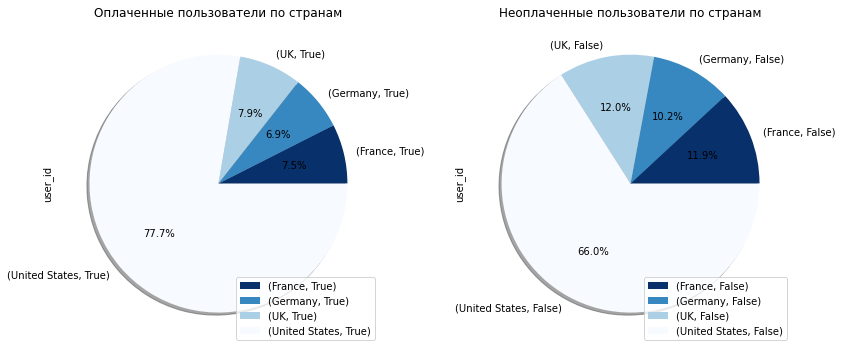

In [30]:
   # задаём размер графиков
plt.figure(figsize=(12, 5))

     # первый график — pie
ax1 = plt.subplot(1, 2, 1)
cat_users.query('payer == True').plot(kind = 'pie', ax=ax1, subplots=True, shadow = True, autopct='%.1f%%', cmap="Blues_r")
plt.title('Оплаченные пользователи по странам')
plt.legend(loc='lower right')

    # второй график — pie
ax2 = plt.subplot(1, 2, 2)
   
cat_users.query('payer == False').plot(kind = 'pie',  ax=ax2, subplots=True, shadow = True, autopct='%.1f%%', cmap="Blues_r")

plt.title('Неоплаченные пользователи по странам')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

На графиках хорошо видно что подавляющее количество пользователей приложения из США. Это видно как среди категории оплаченных так и неоплаченных пользователей

In [31]:
part_pay_t =  profiles.query('payer == True').groupby('region').agg({'user_id':'count'})
part_pay_f =  profiles.query('payer == False').groupby('region').agg({'user_id':'count'})
part = part_pay_t.merge(part_pay_f, on = 'region') 
part['%part'] = part['user_id_x']/((part['user_id_x'])+(part['user_id_y']))*100
part = part.rename(columns={'user_id_x':'оплаченные_польз-ти', 'user_id_y':'бесплатные_польз-ти'})  
part

оплаченные_польз-ти  бесплатные_польз-ти     %part
region                                                           
France                         663                16787  3.799427
Germany                        616                14365  4.111875
UK                             700                16875  3.982930
United States                 6902                93100  6.901862

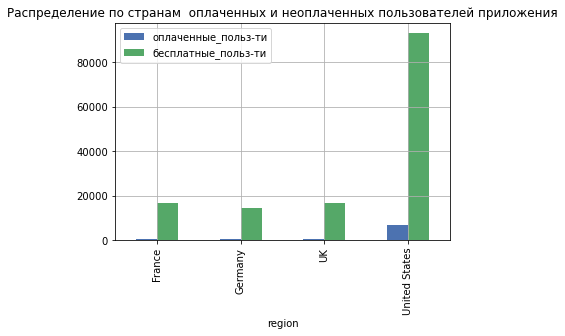

In [32]:
plt.style.use('seaborn-deep')

part.plot(kind='bar', y=['оплаченные_польз-ти','бесплатные_польз-ти'],grid = True)
plt.title('Распределение по странам  оплаченных и неоплаченных пользователей приложения');

Доли  всех пользователей между  Францией, Великобритании и Германии  примерно одинакова, хотя у Германии несколько меньше.  Первое место  по объему пользователей  занимает США, количество пользователей больше суммарных данных по другим странам. Картина  и у оплаченных и у неоплаченных пользователей одинакова.  США на первом месте. Но следует отметить что пользователи из Германии в  процентном соотношении несколько чаще оплачивают пользование платформой  по сравнению с  Францией и Британией.

___

__Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.__

In [33]:
pay_device_t = profiles.query('payer == True').groupby(['device']).agg({'user_id':'count'})
pay_device_f = profiles.query('payer == False').groupby(['device']).agg({'user_id':'count'})
pay_device = pay_device_t.merge(pay_device_f, on = 'device')
pay_device['%part'] = pay_device['user_id_x']/((pay_device['user_id_x'])+(pay_device['user_id_y']))*100
pay_device=pay_device.rename(columns={'user_id_x':'оплаченные_польз-ти', 'user_id_y':'бесплатные_польз-ти'})  
pay_device

оплаченные_польз-ти  бесплатные_польз-ти     %part
device                                                     
Android                 2050                32982  5.851793
Mac                     1912                28130  6.364423
PC                      1537                28918  5.046790
iPhone                  3382                51097  6.207897

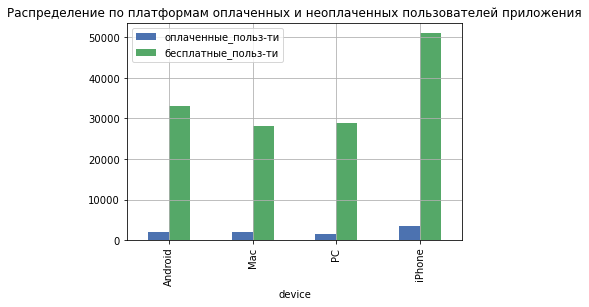

In [34]:
plt.style.use('seaborn-deep')

pay_device.plot(kind='bar', y=['оплаченные_польз-ти','бесплатные_польз-ти'],grid = True);
plt.title('Распределение по платформам оплаченных и неоплаченных пользователей приложения');

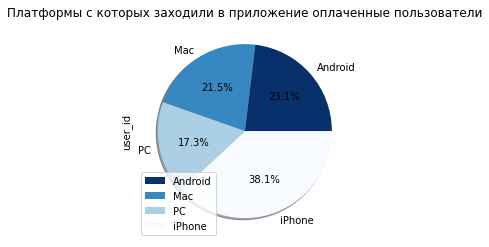

In [35]:
pay_device_t.plot(kind = 'pie', subplots=True, shadow = True, autopct='%.1f%%', cmap="Blues_r")
plt.title('Платформы с которых заходили в приложение оплаченные пользователи')
plt.legend(loc='lower left');

Пользователи платформ iPhone (что не удивительно когда мы знаем что  БОльша  часть посетителей из США)  на первом месте по посещению нашего приложения. С устройств  на базе Android / Mac приблизительно в равной части занимают 2 ступеньку по  посещению  Оплаченными пользователями. На последнем месте - пользователи  PC.

__Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.__

In [36]:
channels_pril = profiles.groupby('channel').agg({'user_id':'nunique', 'payer':'sum'}).sort_values\
                                                                        (by = 'user_id', ascending = False)

channels_pril['%_pay'] = round(channels_pril['payer'] / channels_pril['user_id'] * 100)
channels_pril = channels_pril.rename(columns={'user_id':'Кол-во Польз-ей','payer':'Платящие Польз-ли'}).sort_values\
                                                                        (by = '%_pay', ascending = False)
channels_pril

Кол-во Польз-ей  Платящие Польз-ли  %_pay
channel                                                      
FaceBoom                      29144               3557   12.0
AdNonSense                     3880                440   11.0
TipTop                        19561               1878   10.0
lambdaMediaAds                 2149                225   10.0
RocketSuperAds                 4448                352    8.0
WahooNetBanner                 8553                453    5.0
MediaTornado                   4364                156    4.0
YRabbit                        4312                165    4.0
OppleCreativeMedia             8605                233    3.0
LeapBob                        8553                262    3.0
organic                       56439               1160    2.0

<Figure size 432x288 with 0 Axes>

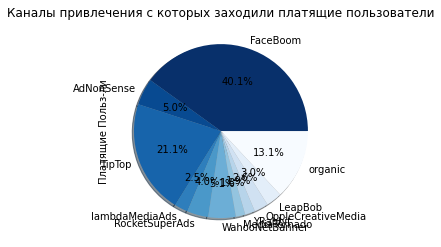

In [37]:
plt.figure()

channels_pril.plot(kind = 'pie', y = 'Платящие Польз-ли', subplots=True, shadow = True, autopct='%.1f%%', cmap="Blues_r", legend= False)
plt.title('Каналы привлечения с которых заходили платящие пользователи');


Всего - 11 платформ. Самая  популярная  платформа с которой заходили Платящие пользователи  на первом месте: FaceBoom (очень похоже на популярную  платформу  в Америке - Facebook),  далее следуют: AdNonSense, TipTop, lambdaMediaAds ... по убыванию ... и замыкает ряд Organic.	
В процентном отношении Organic на последнем месте, но за этот канал не надо платить, с поисковиком надо уметь работать.
Органический в цифровом маркетинге означает использование контента/методов для получения видимости на нескольких цифровых платформах без дополнительной оплаты платформы за рекламу вашего контента. Чтобы создать хороший органический контент, нужно хорошо разбираться во входящем маркетинге) так что маркетологи   Procrastinate Pro+ успешно выполнили  поставленные перед ними задачи по привлечению покупателей из  бесплатного канала. 

___

### Маркетинг

__Посчитаем общую сумму расходов на маркетинг.__

In [38]:
marketing_sum = profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sum()
marketing_sum

acquisition_cost    105497.3
dtype: float64

In [39]:
display(f'На привлечение внимания  пользователей к приложению в рассматриваемый период было \
                                                выделено 105497.3 единиц ден. ср-в')

'На привлечение внимания  пользователей к приложению в рассматриваемый период было                                                 выделено 105497.3 единиц ден. ср-в'

__Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.__

In [40]:
sum_per_chan = profiles.groupby('channel').agg({'acquisition_cost':'sum'}).sort_values\
                                                                        (by = 'acquisition_cost', ascending = False)
sum_per_chan = sum_per_chan.rename(columns={'acquisition_cost':'Расходы на рекламу'})
sum_per_chan

Расходы на рекламу
channel                               
TipTop                        54751.30
FaceBoom                      32445.60
WahooNetBanner                 5151.00
AdNonSense                     3911.25
OppleCreativeMedia             2151.25
RocketSuperAds                 1833.00
LeapBob                        1797.60
lambdaMediaAds                 1557.60
MediaTornado                    954.48
YRabbit                         944.22
organic                           0.00

<Figure size 432x288 with 0 Axes>

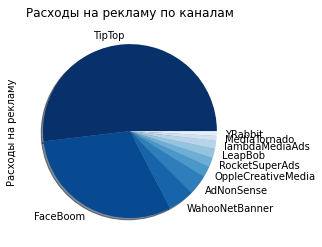

In [41]:
plt.figure()

sum_per_chan.plot(kind = 'pie', y = 'Расходы на рекламу', subplots=True, shadow = True, cmap="Blues_r", legend= False)
plt.title('Расходы на рекламу по каналам');

Более всего было  выделено (чуть боль 50% процентов от  потраченных средств) на   платформу TipTop, около четверти  средств на FaceBoom

In [42]:
sc = costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending = False)
sc

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

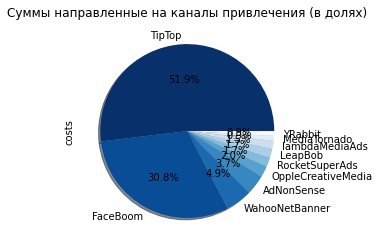

In [43]:
sc.plot(kind = 'pie', y = 'costs', subplots=True, shadow = True, autopct='%.1f%%', cmap="Blues_r", legend= False)
plt.title('Суммы направленные на каналы привлечения (в долях)');

__Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.__

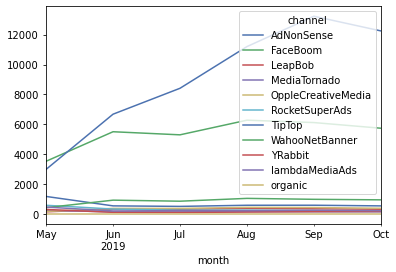

In [44]:
sum_chan_month = profiles.pivot_table(index='month', columns = 'channel', values='acquisition_cost', aggfunc='sum')
sum_chan_month.plot();

In [45]:
sum_chan_month

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                         
2019-05-01     1169.70    3524.4   140.28        238.56              169.75   
2019-06-01      538.65    5501.1   314.58        138.00              370.00   
2019-07-01      504.00    5294.3   313.53        138.48              366.50   
2019-08-01      579.60    6274.4   369.81        154.56              439.25   
2019-09-01      581.70    6114.9   343.98        144.72              427.75   
2019-10-01      537.60    5736.5   315.42        140.16              378.00   

channel     RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  \
month                                                                          
2019-05-01         577.980   2981.0           418.8   299.70           458.4   
2019-06-01         325.715   6675.6           921.0   106.20           199.2   
2019-07-01         252.070   8410.2           851.4    97.38           219.2   
2019-08-01         253.110  11202.0          1040.4   124.74           220.0   
2019-09-01         218.400  13232.5           977.4   152.79           247.2   
2019-10-01         205.725  12250.0           942.0   163.41           213.6   

channel     organic  
month                
2019-05-01      0.0  
2019-06-01      0.0  
2019-07-01      0.0  
2019-08-01      0.0  
2019-09-01      0.0  
2019-10-01      0.0

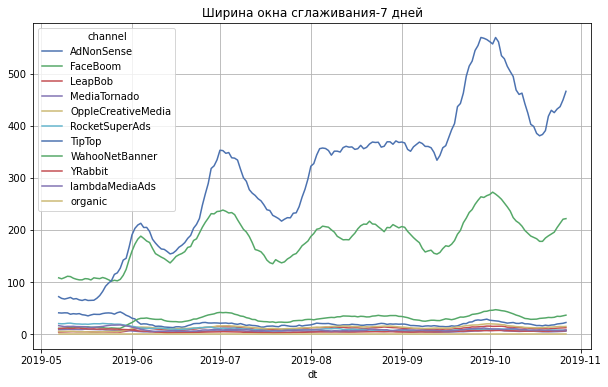

In [46]:
# создаем таблицу  расходов по дням (сумма)
sum_chan = profiles.pivot_table(index='dt', columns = 'channel', values='acquisition_cost', aggfunc='sum') 

for column in sum_chan.columns.values:
    sum_chan[column] = sum_chan[column].rolling(7).mean()
    # строим график
sum_chan.plot(figsize = (10,6), grid=True)
plt.title('Ширина окна сглаживания-7 дней')
    
plt.show() 


In [83]:
sum_chan.head(10)

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
dt                                                                            
2019-05-01         NaN       NaN      NaN           NaN                 NaN   
2019-05-02         NaN       NaN      NaN           NaN                 NaN   
2019-05-03         NaN       NaN      NaN           NaN                 NaN   
2019-05-04         NaN       NaN      NaN           NaN                 NaN   
2019-05-05         NaN       NaN      NaN           NaN                 NaN   
2019-05-06         NaN       NaN      NaN           NaN                 NaN   
2019-05-07         NaN       NaN      NaN           NaN                 NaN   
2019-05-08         NaN       NaN      NaN           NaN                 NaN   
2019-05-09         NaN       NaN      NaN           NaN                 NaN   
2019-05-10         NaN       NaN      NaN           NaN                 NaN   

channel     RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  \
dt                                                                            
2019-05-01             NaN     NaN             NaN      NaN             NaN   
2019-05-02             NaN     NaN             NaN      NaN             NaN   
2019-05-03             NaN     NaN             NaN      NaN             NaN   
2019-05-04             NaN     NaN             NaN      NaN             NaN   
2019-05-05             NaN     NaN             NaN      NaN             NaN   
2019-05-06             NaN     NaN             NaN      NaN             NaN   
2019-05-07             NaN     NaN             NaN      NaN             NaN   
2019-05-08             NaN     NaN             NaN      NaN             NaN   
2019-05-09             NaN     NaN             NaN      NaN             NaN   
2019-05-10             NaN     NaN             NaN      NaN             NaN   

channel     organic  
dt                   
2019-05-01      NaN  
2019-05-02      NaN  
2019-05-03      NaN  
2019-05-04      NaN  
2019-05-05      NaN  
2019-05-06      NaN  
2019-05-07      NaN  
2019-05-08      NaN  
2019-05-09      NaN  
2019-05-10      NaN

Как и ожидалось, визуализация динамики изменения расходов во времени месячного графика имеет более сглаженный вид.
В сентябре был пик расходов по каналу AdNonSense хотя  этот канал всего  лишь на 4 месте  по расходованию от общего бюджета.
Пик расходов на канал  FaceBoom  отмечен  в конце августа

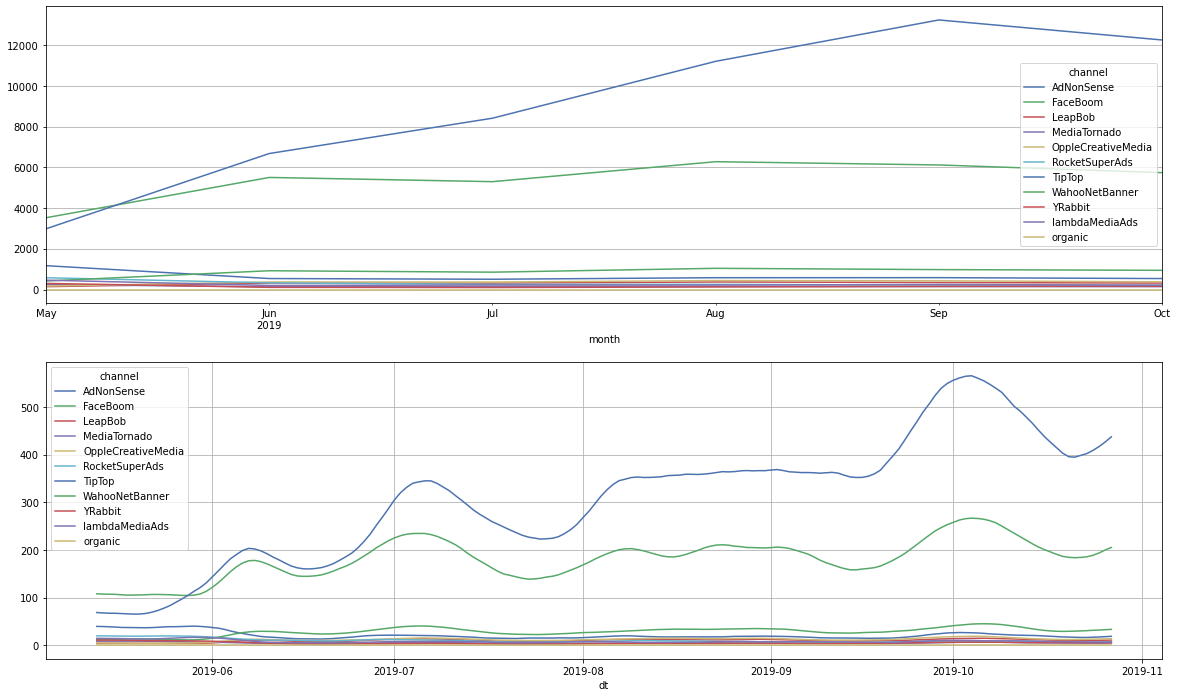

In [47]:
plt.figure(figsize=(20, 12))

sum_chan_month.plot(grid=True, ax=plt.subplot(2, 1, 1))



for column in sum_chan.columns.values:
    sum_chan[column] = sum_chan[column].rolling(7).mean()
    # строим график
sum_chan.plot(grid=True, ax=plt.subplot(2, 1, 2))

# plt.title('Ширина окна сглаживания-7 дней')

plt.show()

__Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.__

Customer Acquisition Cost, — стоимость привлечения одного клиента. Сумма денег, в которую компании обходится каждый новый клиент. В сущности, CAC — это инвестиции в маркетинг.

In [48]:
lu = profiles['user_id'].unique()

cac_by_channel_mean = profiles.query('user_id == @lu').groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(\
                                                                         by = 'acquisition_cost', ascending=False)

cac_by_channel_mean = cac_by_channel_mean.rename(columns={'acquisition_cost':'средняя_стоимость'})
cac_by_channel_mean

средняя_стоимость
channel                              
TipTop                       2.799003
FaceBoom                     1.113286
AdNonSense                   1.008054
lambdaMediaAds               0.724802
WahooNetBanner               0.602245
RocketSuperAds               0.412095
OppleCreativeMedia           0.250000
YRabbit                      0.218975
MediaTornado                 0.218717
LeapBob                      0.210172
organic                      0.000000

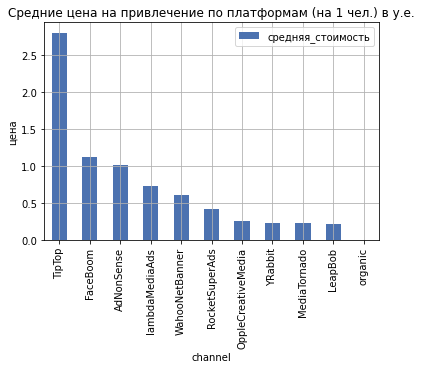

In [49]:
plt.style.use('seaborn-deep')

cac_by_channel_mean.plot(kind='bar', y=['средняя_стоимость'],grid = True)
plt.title('Средние цена на привлечение по платформам (на 1 чел.) в у.е.')
plt.ylabel('цена');

Стоимость привлечения  пользователя с платформы TipTop - самая высокая. если округлить - 2,80 у.е.
FaceBoom, которая привлекает больше  пользователей, в т.ч. имеющий статус "Платящих" больше чем в 2 раза   ниже чем стоимость привлечения   топового пункта в этом рейтинге - 1,11 у.е. Ну и  самая  низкая стоимость привленчия 1 пользователя - 'LeapBob' - 0.210172. Платформа   organic как  и следует, БЕСЦЕННА).

In [50]:
z = marketing_sum/len(lu)

display(f'Стоимость привлечения каждого уникального пользователя составляет {z} у.ё') 

'Стоимость привлечения каждого уникального пользователя составляет acquisition_cost    0.703278\ndtype: float64 у.ё'

In [51]:
mean_not_organic = profiles.query('channel != "organic"').acquisition_cost.mean()
mean_not_organic

1.127481323942928

 В среднем  сумма затраченная на привлечение 1 посетителя (по каналам привлечения) составляет 1,127 у.е.

#### Оценим окупаемость рекламы

__Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. 
Установим момент и горизонт анализа данных. 
Считаем, что на календаре 1 ноября 2019 года и зададим 2-х недельный горизонт анализа.
т.к. мы рассматриваем пользователей которые были привлечены  путем рекламы, канал Organic убираем из  рассматриваемых данных__

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.


Установим __момент и горизонт анализа данных. 
Текущая дата анализа - 1 ноября 2019 года__, и зададим 2-х недельный горизонт анализа.

In [52]:
observation_date = datetime(2019,11,1).date()  # момент анализа
horizon_days = 14  # горизонт анализа в днях
profiles = profiles.query('channel != "organic"')# исключаем из анализа  поисковики (бесплатный канал привлечения organic)

Для начала оценим общую ситуацию — посмотрим на окупаемость рекламы. Рассчитаем и визуализируем LTV и ROI, вызвав функции get_ltv() и plot_ltv_roi().

In [53]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

ltv_grouped 

cohort_size      0.0       1.0       2.0      3.0       4.0  \
cohort                                                                   
All users        88644  0.34558  0.435754  0.504507  0.56109  0.611436   

                5.0      6.0       7.0       8.0       9.0      10.0     11.0  \
cohort                                                                          
All users  0.654368  0.69414  0.729778  0.764619  0.796665  0.826152  0.85207   

               12.0     13.0  
cohort                        
All users  0.878116  0.90203

Выведем LTV на каждое время жизни когорты  рассматриваемого периода (Лайфтайм)
Для расчёта LTV выручку с накоплением за текущий день делят на размер когорты, то есть количество активных пользователей на первый день. 
В нашем случае видим что в последний день показатель составлял  0.90203 у.е.


Выведем данные по ROI (окупаемость инвестиций).


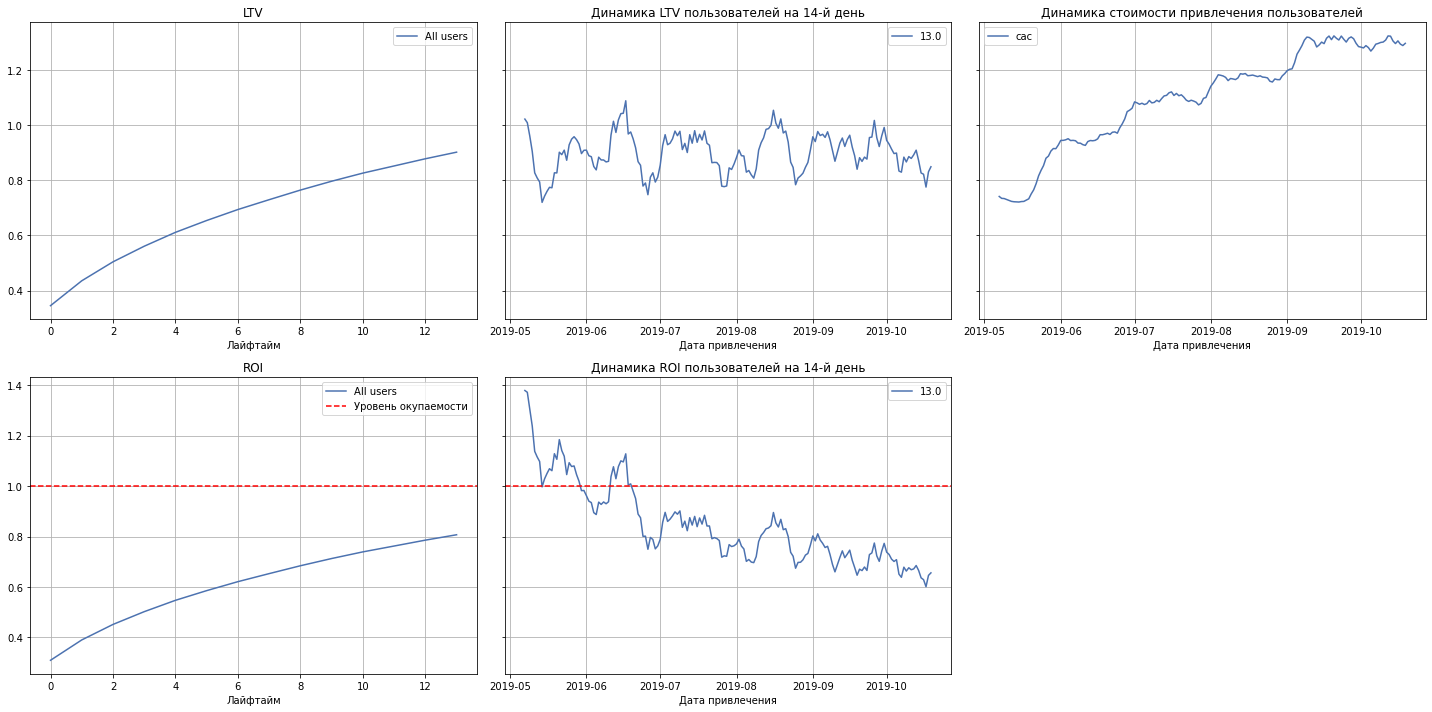

In [54]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

In [55]:
roi_grouped

cohort_size       cac       0.0       1.0       2.0       3.0  \
cohort                                                                     
All users        88644  1.117794  0.309163  0.389834  0.451341  0.501962   

                4.0      5.0       6.0       7.0       8.0       9.0  \
cohort                                                                 
All users  0.547002  0.58541  0.620991  0.652873  0.684043  0.712711   

               10.0      11.0      12.0      13.0  
cohort                                             
All users  0.739091  0.762278  0.785579  0.806974

ROI – показатель динамический, а значит и фиксировать его нужно регулярно, после каждого изменения в рекламной кампании.

ROI (окупаемость инвестиций) в конце рассматриваемого нами периода (14 дней) немного более 80 % 
Что мы видим  построив графикиLTV и ROI?
 


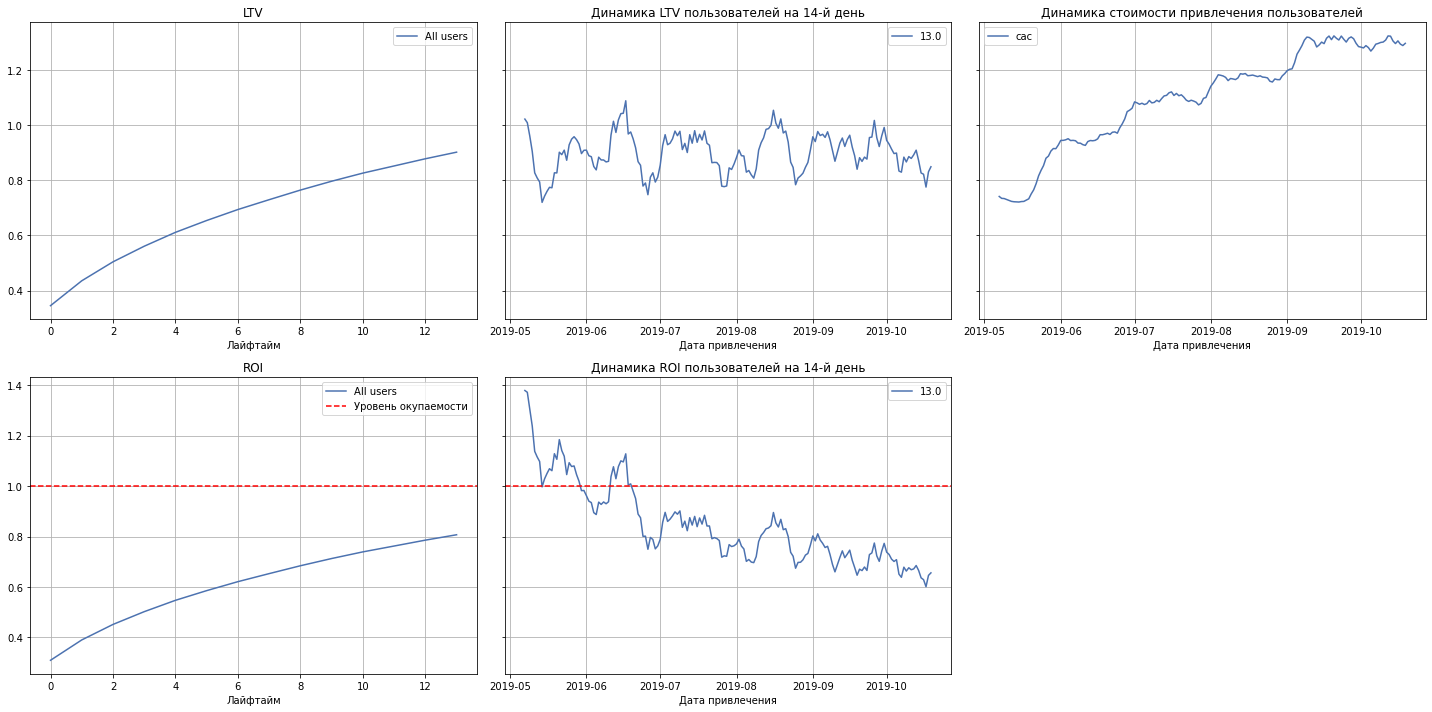

In [56]:
# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

CAC(стоимость привлечения покупателей) с мая по июнь резко поднимается  и постепенно увеличивается бюджет на привлечение пользователей.


ROI не пересекает порог окупаемости на уровне 100% (пунктир - единица). Соответственно реклама не окупается. 
Динамика ROI  стабильно падает приблизительно  с июня. И   как раз в это время  начинают поднимать бюджет на рекламу.


LTV  "прыгает" но стабилен, нет определенного тренда в динамики, диапазон в районе 0,7 - и немного выше 1, дело не в ухудшении качества пользователей.


__Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.__

In [57]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, observation_date, horizon_days)
result_grouped


cohort_size       0.0       1.0       2.0       3.0     4.0  \
cohort                                                                   
All users        88644  0.058752  0.066321  0.069999  0.072571  0.0745   

                5.0       6.0       7.0       8.0       9.0      10.0  \
cohort                                                                  
All users  0.075775  0.076745  0.077591  0.078291  0.078945  0.079362   

               11.0      12.0      13.0  
cohort                                   
All users  0.079678  0.079904  0.080197

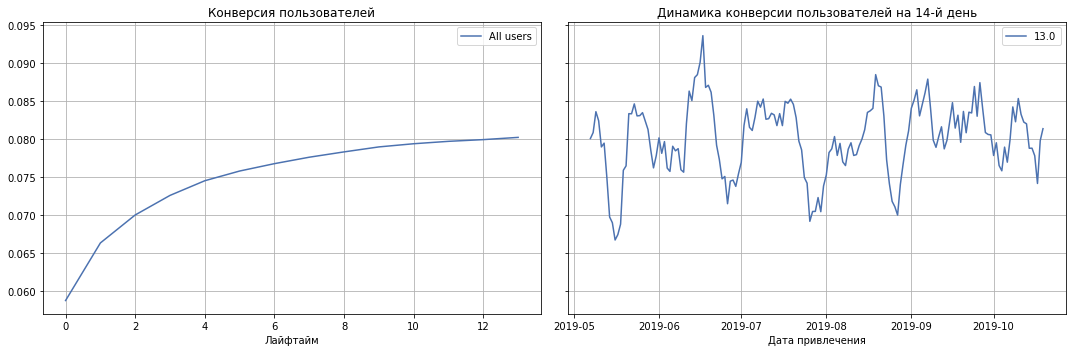

In [58]:
plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

Разделение на платящих и неплатящих пользователей в контексте конверсии не имеет смысла.
Конверсия показывает, какой процент пользователей или потенциальных клиентов совершили целевое действие: оставили заявку, купили товар, подписались на рассылку и так далее.

Конверсию считают по формуле: CV = Количество целевых действий / Общий трафик × 100%
Количество целевых действий — это покупки, заявки на сайте, подписки на рассылку. Всё, что вы ставите целью вашего маркетинга.
конверсия из показов в переходы на целевую страницу,
конверсия из переходов на сайт в конверсионное действие, необходимое бизнесу — заявку, покупку, переход в чат-бот,
конверсия из лида в продажу.

В нашем примере мы видимо что  в данный период 88644 уникальных посетителей, кривая конверсия  поднимается  до 8%  к концу  14 дня с начала 6 % первого дня. Темп вялый. Учитывая предыдущие данные по затратам на привлечение  пользователей можно  задуматься об эффективности  привлечения бюджета.



In [59]:
result_raw, result_grouped, result_in_time = get_retention(profiles, visits, observation_date, horizon_days) 
#удержание пользователей



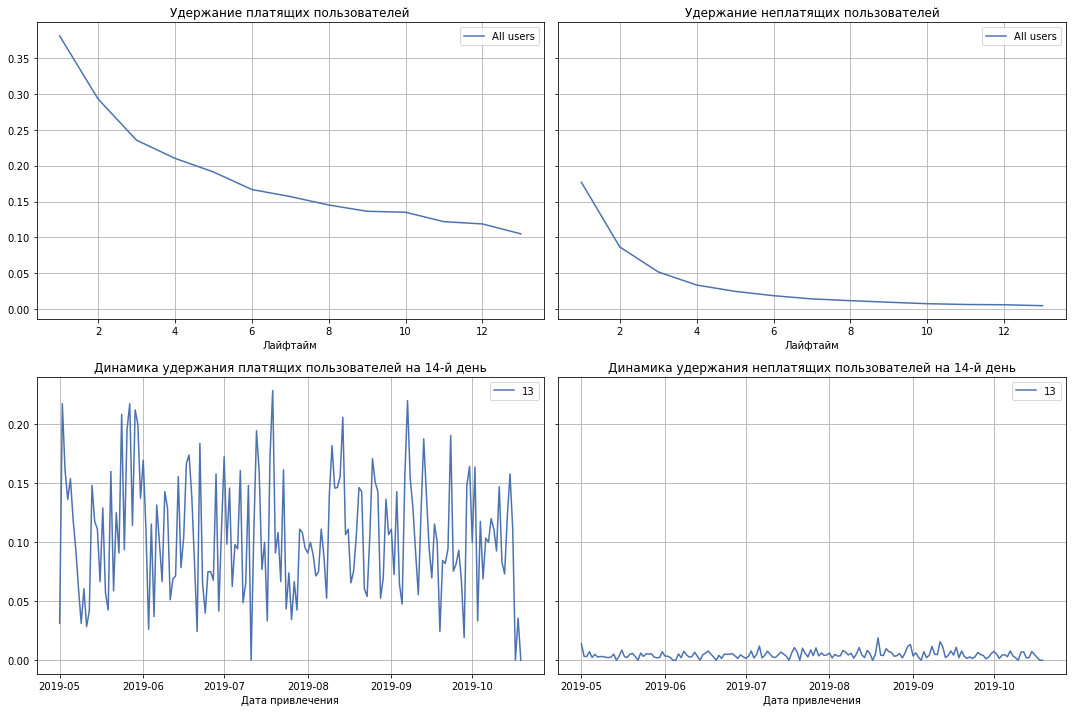

In [60]:
plot_retention(result_grouped, result_in_time, horizon_days, window=1)

Retention Rate — это коэффициент удержания клиентов. Он показывает, насколько долго остаются постоянные клиенты с компанией. Это важно, ведь они более лояльная аудитория для повторных продаж и помогают увеличивать прибыль, привлекают новых клиентов за счет рекомендаций.
Чтобы рассчитать Retention Rate, количество активных пользователей на текущий день делят на количество активных пользователей на первый день.

Коэффициент удержания платящих  пользователей  как на начало  рассматриваемого периода так и на окончание существенно выше чем у  неплатящих пользователей. Платящие пользователи  с бОльшей вероятностью и далее рассматриваемого периода останутся пользователями. В то время как неплатящая категория  уйдет.
Динамика красноречивее показывает насколько  активно платящие пользователи  в период с мая по окончание  октября  пользуются приложением.


__Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.__

Чтобы разобраться в причинах, пройдём по всем доступным устройствам (платформам) пользователей. 
В самом начале  мы узнали что это:['iPhone', 'Mac', 'Android', 'PC']
Передадим  название колонки "device" в параметр dimensions. 

In [61]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=["device"])

#plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=1) 

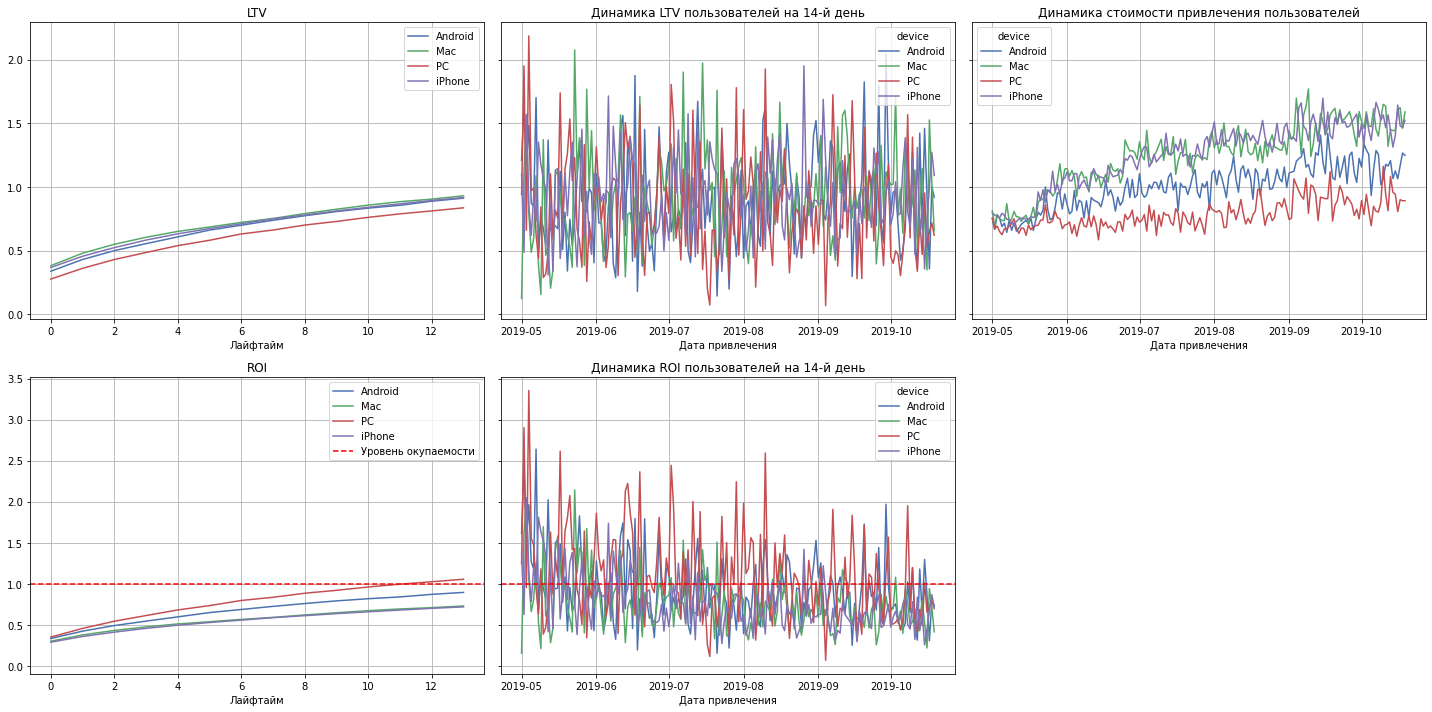

In [62]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=1) # слишком шумно, сгладим графики 

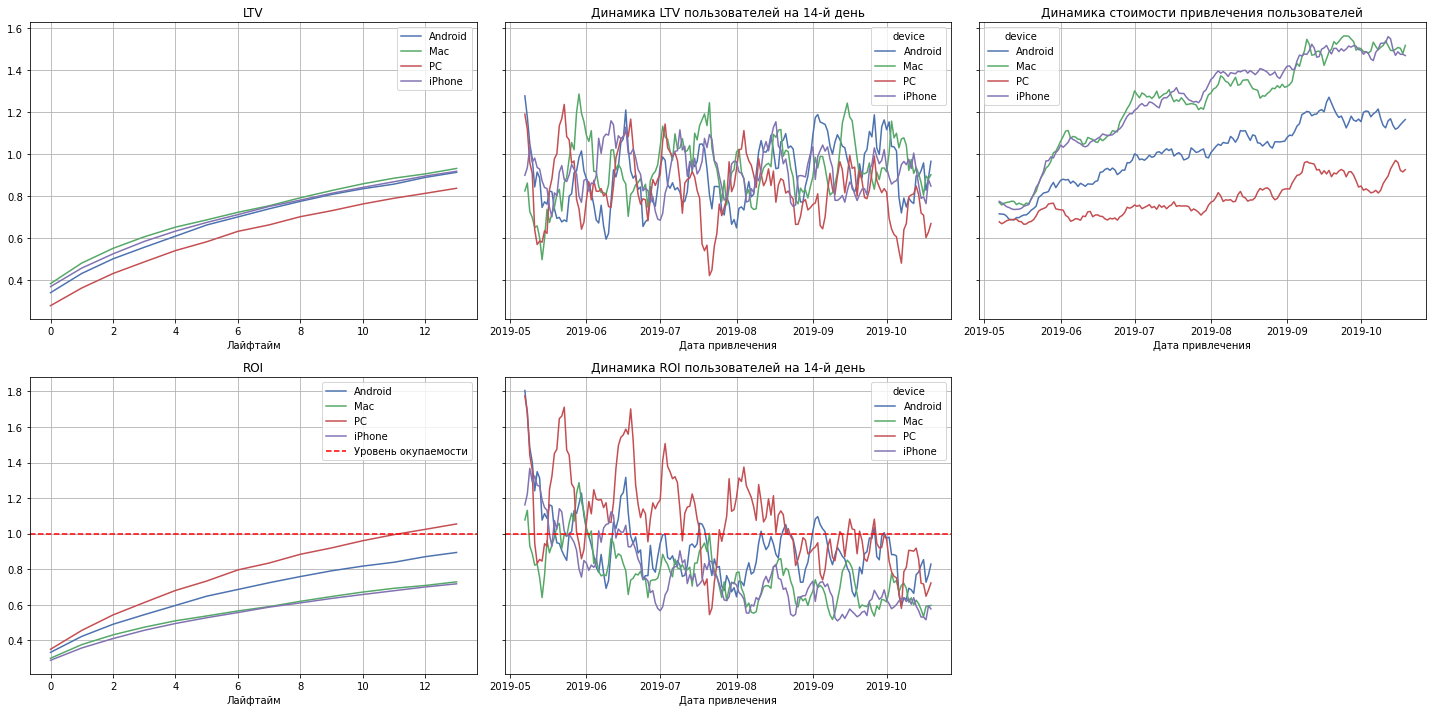

In [63]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

LTV (lifetime value) платформ Mac-iPhone несколько выше чем у других,но устройства на платформе PC  ниже.  На 14 день   коэффициент достигает 0,9.

Динамика LTV также хаотична в разрезе от 0,3 до 1,3, но устройства PC также  имеют тенденцию к  снижению в разные периоды - именно они опускаются до показателей 0,3.

Динамика  стоимости привлечения пользователей явно указывает на  что  устройства на PC имеет самые низкие показатели. На Максимуме опять же Mac-iPhone.

В то же время  окупаемость (ROI) сигнализирует что только  устройства PC на 11 день  окупается, в то время как другие платформы  сильно ниже  и даже к 14 дню приблизительно  в  0,3 от единицы. Надо это отметить  т.к. Динамика стоимости привлечения говорит о другом.

Динамика ROI на 14 день говорит  что  устройства PC  в мае-июле имеют более широкий диапазон динамики, в период до сентября(за некоторым исключением они имели успех в окупаемости, а вот осенью окупаемость сошла на нет.
Пользователи Mac-iPhone с самого начала по месяцам  почти не окупались, но  нет такой широты амплитуды в графике. Таким образов в  мае  картина  использования   пользователями платформ была более "Окупаемой" чем к концу данных (сентябрь). 

Посмотрим на конверсию относительно платформ-устройств и визуализируем данные.

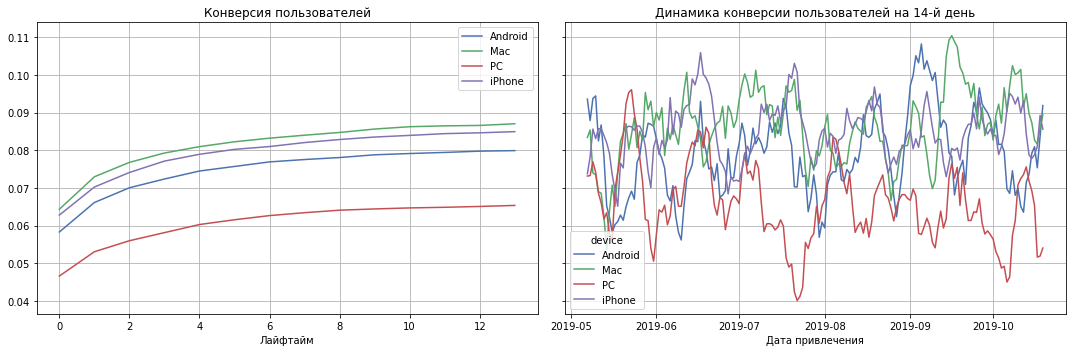

In [64]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, \
                                    observation_date, horizon_days, dimensions = ['device'])

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

Конвертация  прослеживается на всех  платформах. Отметим что PC имеет низкий старт, все оставшиеся платформы на порядок выше. 
Отметим этот факт. Передадим  информацию  разработчикам Приложения.  Динамика конверии  сильнее визуализирует тренд - очень много  движений вниз.


__Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.__

Передадим  название колонки "region" в параметр dimensions. 
Страны  из которых  посещают  Приложение:'United States', 'UK', 'France', 'Germany'.
Передадим данные и построим график, постораемся устранить шумы.

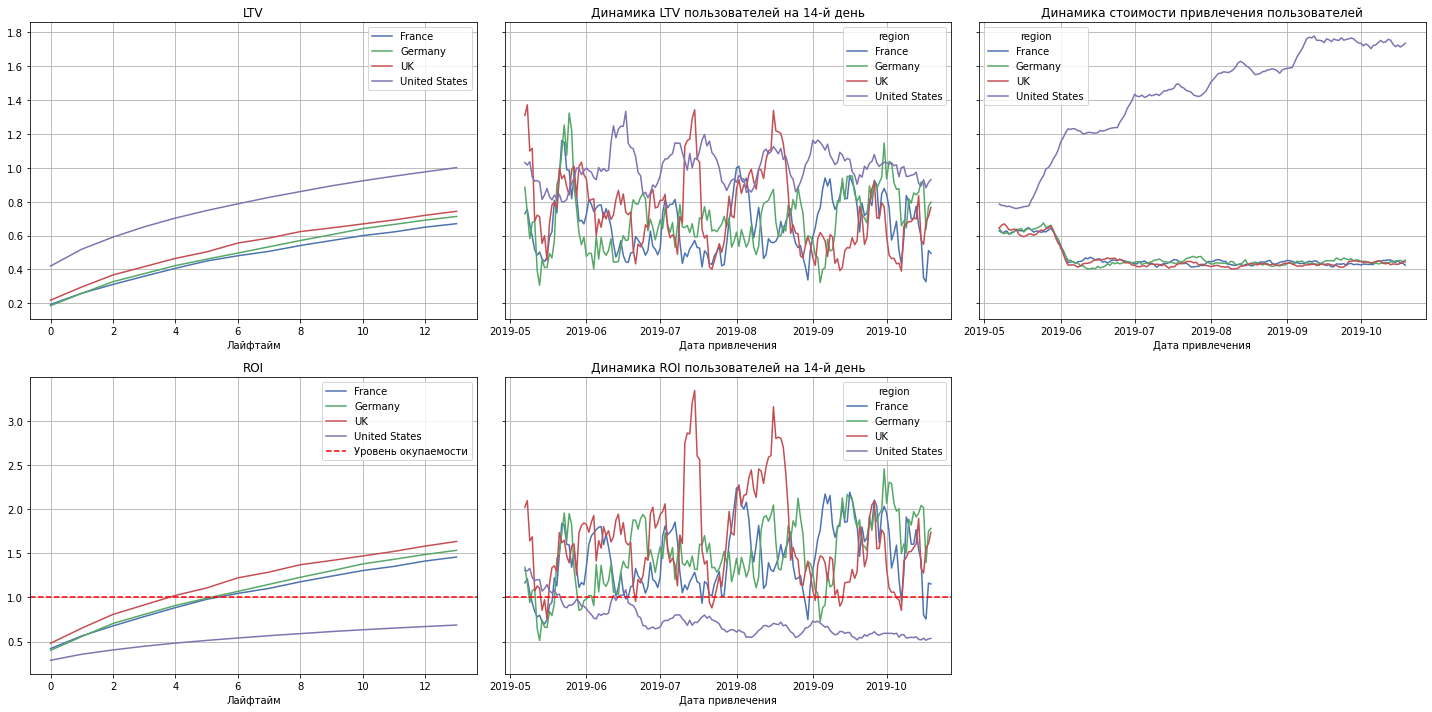

In [65]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

LTV (lifetime value) пользователей США на порядок выше чем у других, на 14 день достигает   коэффициент - 1 хорошие показатели, в отличает от  трех других.   Пользователи 'UK', 'France', 'Germany' идут в тренде  друг с другом и к концу 14  дня имеют коэффициент (максимум)  между 0,7 - 0,8.

Динамика LTV  по странам  в районе от 0,3 до 1,4.

Динамика  стоимости привлечения пользователей явно указывает что пользователи США  устойчиво на максимуме, в то же время  где-то с июня пользователи 3 других стран  упали с 0,6 до 0,4 но тем не менее остались на этом уровне до конца времени предоставлвенных данных.

В то же время  окупаемость (ROI) сигнализирует что только  пользователи  из  США  до конца 14 дней рассмотрения  так и не  окупились, в то время как  пользователи  других стран почти синхронно   4 дн.(UK) - 5('France', 'Germany')  дня перешли этот уровень 

Динамика ROI на 14 день говорит  что  польшователи США  еще в  мае  являлись окупаемыми, а  уже с середины мая  ушли в  иной статус и  постепенно их окупаемость снижается. Минимум - 0,5.

Именно в середине  мая  у всех стран аномалия  - они синхронно упали ниже 1.



Посмотрим на конверсию относительно стран и визуализируем данные.

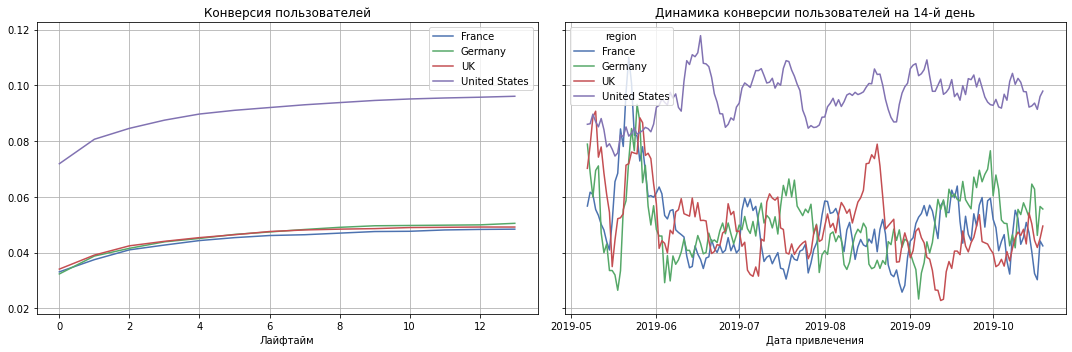

In [66]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, \
                                    observation_date, horizon_days, dimensions = ['region'])

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

Конверсия жителей  США  ГОРАЗДО выше  всех остальных стран. На обоих графиках  видно подтверждени слов.
С июня  Динамика конверсии показывает  большой всплеск, в то время как  другие  страны не  смогли удержать подъем и скатились вниз.

__Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.__

Маркетологи выбрали следующие рекламныt каналы (channel) для привлечения  пользователей: 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom','MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner', 'OppleCreativeMedia', 'lambdaMediaAds'.

Построим графики и сгладим данные.

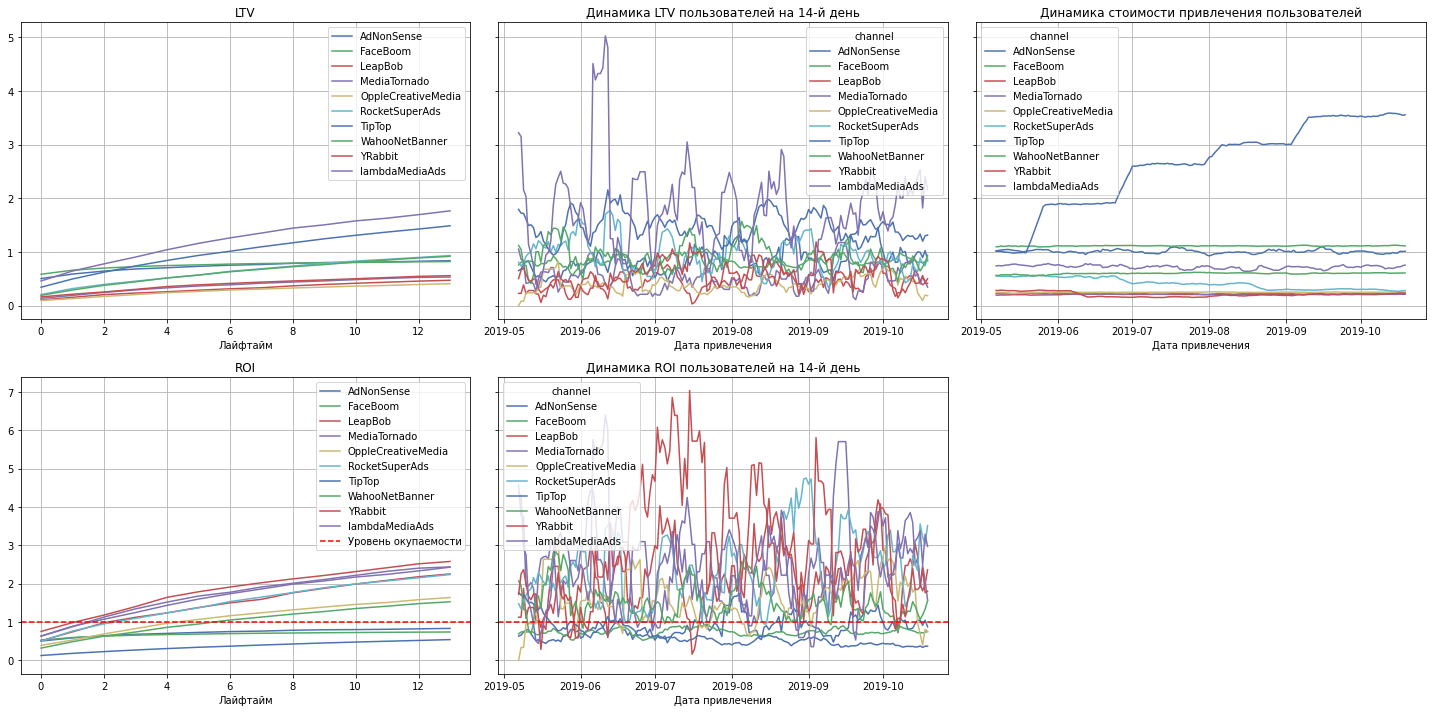

In [67]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

LTV (lifetime value) пользователей  каналов 'lambdaMediaAds'  и  'TipTop'  наиболее  высокий к концу 14 дн. периода. Другие каналы в своей масса   не достигают уровня 1- есть часть которая и  вовсе   с  1 дня  немного приподнялись. Есть ли смысл привлекать  бюджет на эти каналы. скорее всего - нет.


Динамика LTV  по каналам - сильно заметно что канал  'lambdaMediaAds'  и   тот же 'TipTop'  имеют БОльшую амплитуду  привлечения и пользования платформами.


В то же время  окупаемость (ROI)  только  тремя  каналами не вышла  за пределы 1 - среди этой тройки также есть и Tiptop. Те каналы которые пеодолели рубеж в 1 совершили это в период со 2 - 7 день.

Динамика ROI  -  YRabbit  начинает подниматься с июня,  успех не мог сохранить в конце осени, динамика на 14 день  пришла к финалу. Канал 'lambdaMediaAds' имел успех в июне,  но сохранил серединные  показатели  по сравнению с другими каналами. 'TipTop' -'FaceBoom' в отличие от других каналов  так и  не  смогли  преодолеть  1.

Каналы которые не окупаются: 'TipTop', 'AdNonSense' 'FaceBoom'

Посмотрим на конверсию относительно рекламным каналам и визуализируем данные.

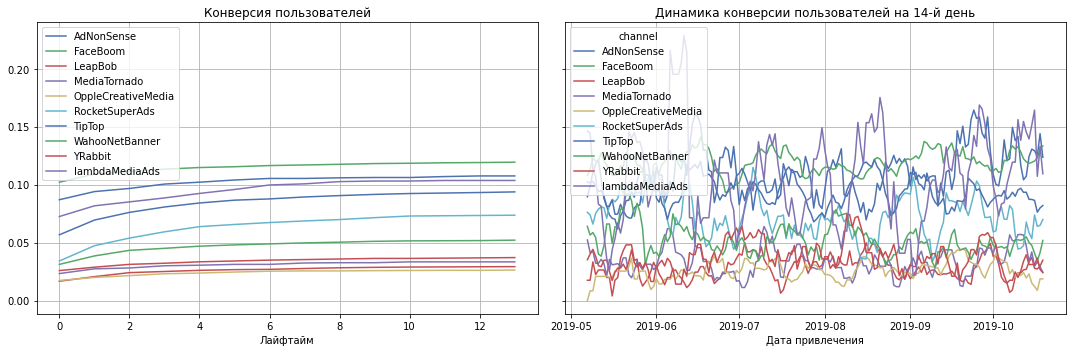

In [68]:
result_raw, result_grouped, result_in_time = get_conversion(profiles, orders, \
                                    observation_date, horizon_days, dimensions = ['channel'])

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

LambdaMediaAds & FaceBoom лучше  помогают конвертировать  пользователей из одного статуса в другой.

___

- У нас есть  2   группы  пользователейпо странам -  из маркетингового анализа: США и страны Европы по посещаемости  приложения. Посмотрим на показатели конверсии отдельно по каналам рекламы.

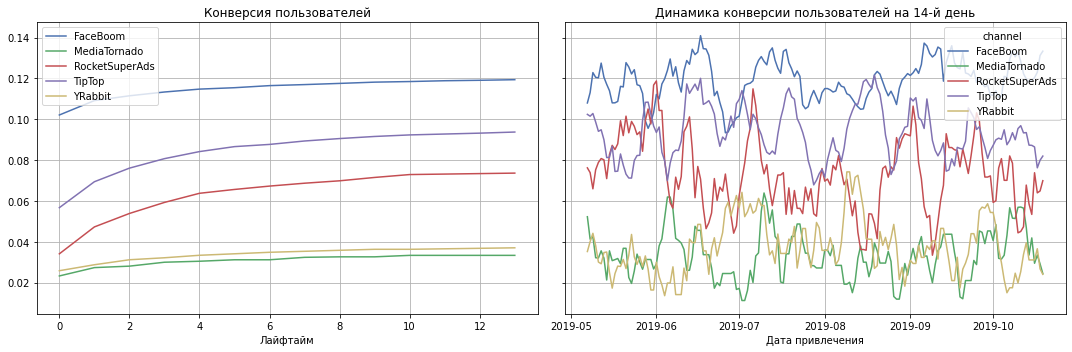

In [69]:
profiles_usa = profiles.query('region == "United States"')
result_raw, result_grouped, result_in_time = get_conversion(profiles_usa, orders, \
                                    observation_date, horizon_days, dimensions = ['channel'])

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

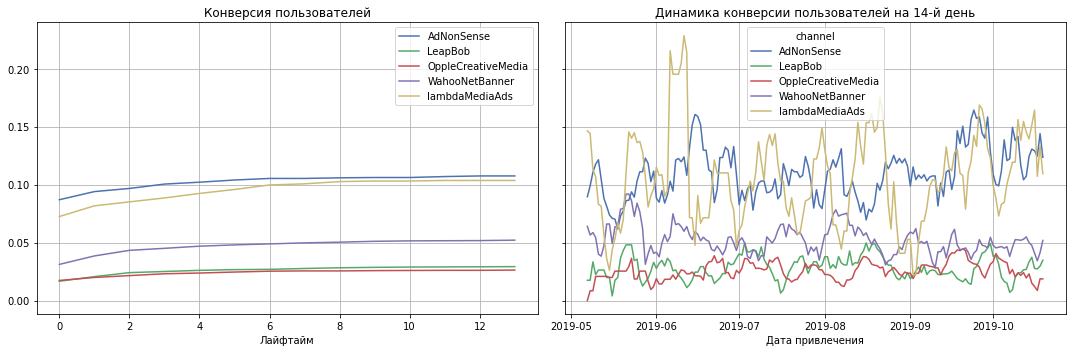

In [70]:
profiles_euro = profiles.query('region != "United States"')
result_raw, result_grouped, result_in_time = get_conversion(profiles_euro, orders, \
                                    observation_date, horizon_days, dimensions = ['channel'])

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

В США  лидеры каналов конвертации: Faceboom,TipTop,  а MediaTornado  & YRabbit -аутсайдеры.
В Европе лучшие  конверсии  поьзователей демонстрируют: AdNonSense & lambdaMediaAds.
OppleCreativeMedia в Европе  имеет наименьшие  показатели динамики конверсии на 14 день,также как и 
'LeapBob'.
 

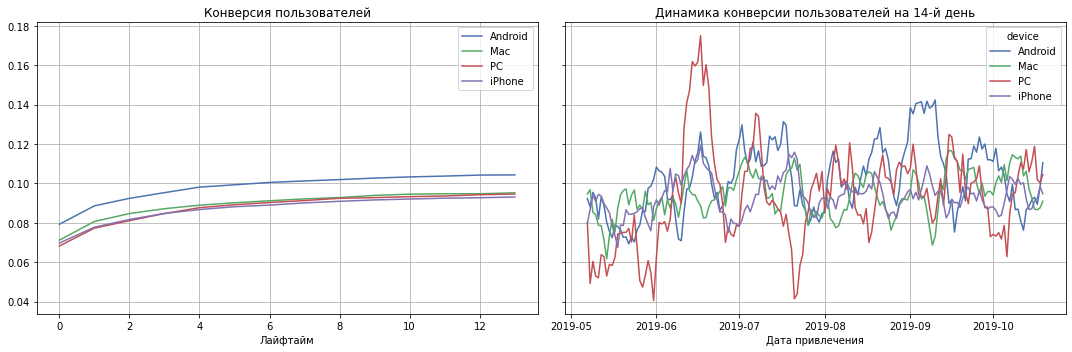

In [71]:
profiles_usa = profiles.query('region == "United States"')
result_raw, result_grouped, result_in_time = get_conversion(profiles_usa, orders, \
                                    observation_date, horizon_days, dimensions = ['device'])

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)


В США конверсия  (переход из одного статуса в другой)  выше на устройствах Андроид,  и  разрыв  виден даже  на 14 день  по отношению к другим платформам. При рассмотрении динамику конверсии пользователя на 14- день,  то у устройств PC видны просадки вниз в июне, середине июля и в октябре -проседание. Устройства на платформе Android также подвержена колебаниям в динамике конверсии  пользователей, но в отличие от PC  с середины мая она сохранила устойчивость наравне  с Mac  и  Iphone.  
Складывается  впечатление что   платформы Mac  и  Iphone  работают более устойчивее, PC надо взять  "на карандаш".


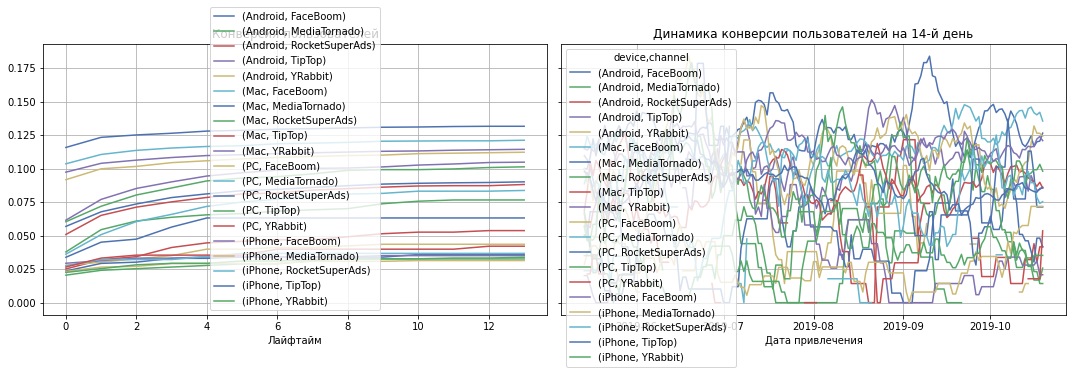

In [72]:

result_raw, result_grouped, result_in_time = get_conversion(profiles_usa, orders, \
                                    observation_date, horizon_days, dimensions = ['device','channel'])

plot_conversion(result_grouped, result_in_time, horizon_days, window=14)

 США - Смею предположить что конверсия  на Android FaceBoom  выглядит лучше по отношению к другим каналам. и устройствам.

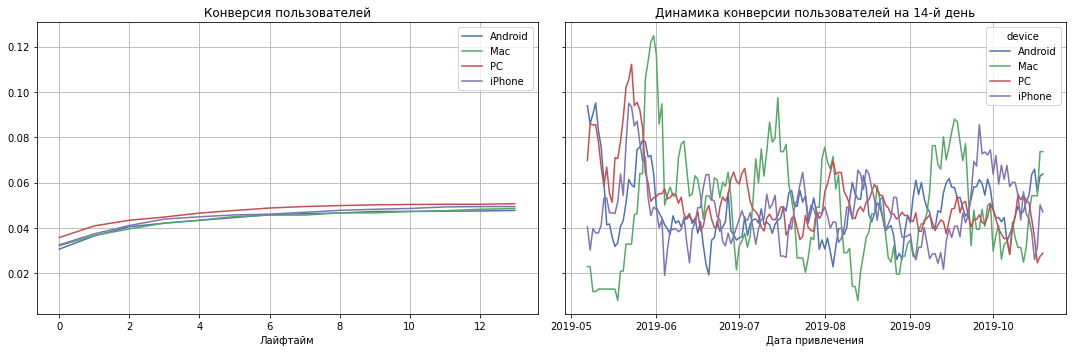

In [73]:

result_raw, result_grouped, result_in_time = get_conversion(profiles_euro, orders, \
                                    observation_date, horizon_days, dimensions = ['device'])

plot_conversion(result_grouped, result_in_time, horizon_days, window=7)

Европа: В целом   конверсия  на всех устройствах  начинается одинаково, подъем небольшой, в пределах  0,2 п. 

На  устройствах Mac на 14 день видим серьезные переходы вверх-вниз, амплитуда от 0,01 до 0,13 в мае. далее   амплитуда снижается, но нет выраженной устойчивости в  динамике конверсии. 
В середние мая и середине  августа сильные просадки. Отметим также что устройства PC c мая имеют тенденцию к снижению по динамике  конверии  на 14 день. 


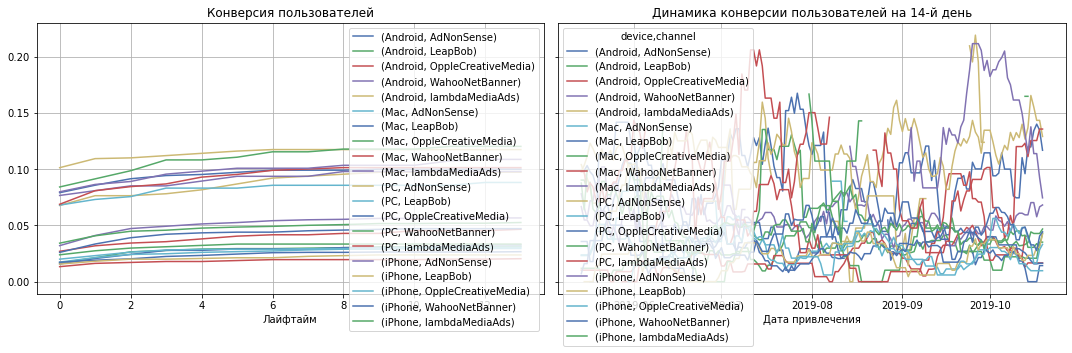

In [74]:

result_raw, result_grouped, result_in_time = get_conversion(profiles_euro, orders, \
                                    observation_date, horizon_days, dimensions = ['device','channel'])

plot_conversion(result_grouped, result_in_time, horizon_days, window=14)

Возможно !? отметим что  в Европе конверсия  лучше на устройствах Android на канале LambdaMediaAds,  Отчетливо видны 2 ветки с начала жизни пользователей.

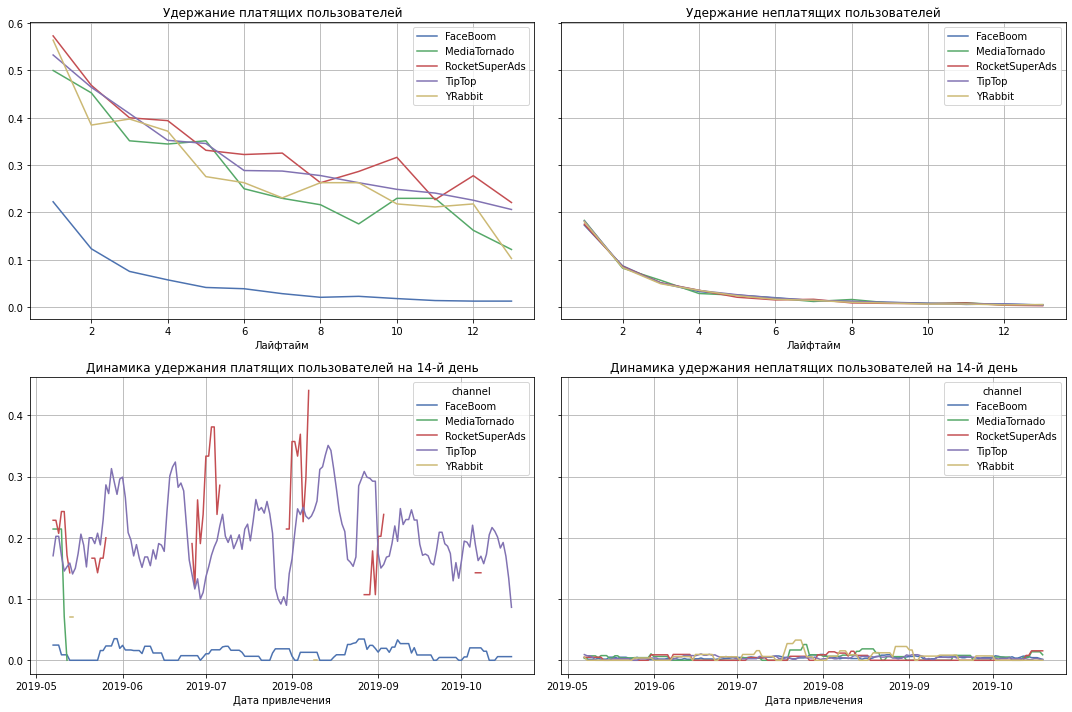

In [75]:
result_raw, result_grouped, result_in_time = get_retention(profiles_usa, visits, observation_date, \
                                                           horizon_days, dimensions=['channel'])
plot_retention(result_grouped, result_in_time, horizon_days, window=7)

США: При  рассмотрении графика удержания  по каналам видим что  канал Face Boom  и стартует и заканчивает динамику удержания  Платящих пользователей на  14 день c  одинаковой тенденцией по отношению к другим каналам сильно ниже, приблизительно на 0,15-0,20 п. Неплатящие пользователи начинают в районе 0,2 п. и приблизительно к 8 дню "жизни группы" удержание заканчивается.  Динамика удерживания платящих пользователей на 14 день  - Tiptop доминирует по удерживанию по отношению к другим платформам. FaceBoom  от 1 дня до 14  дня жизни  почти 0-ой показатель по платящим пользователям.

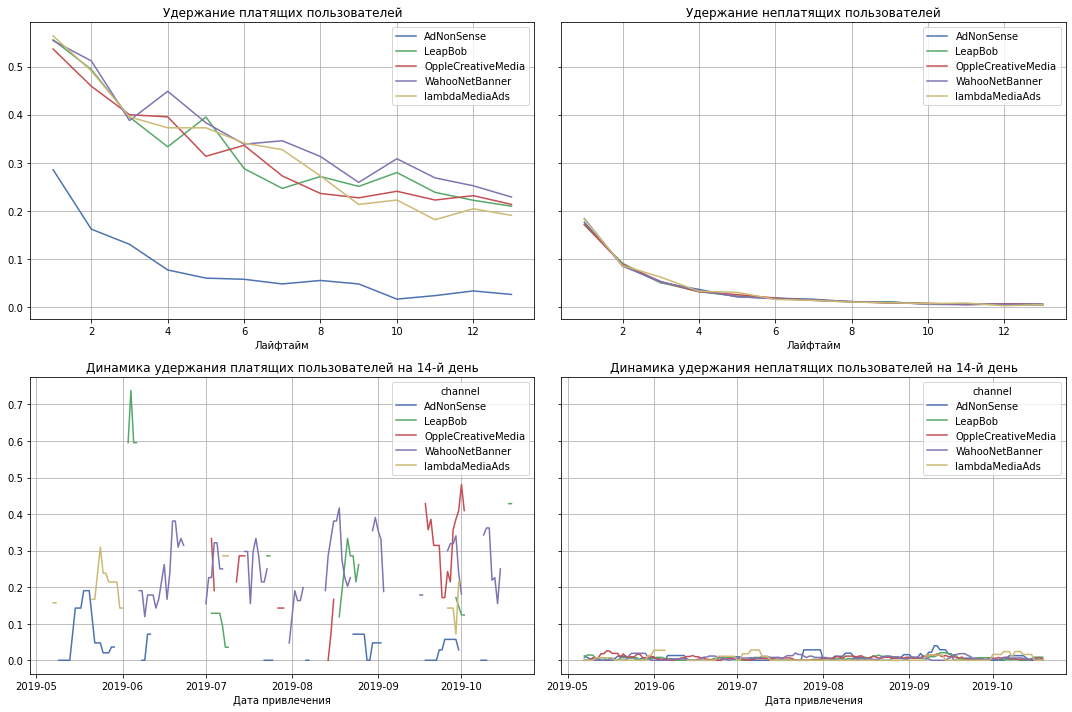

In [76]:
result_raw, result_grouped, result_in_time = get_retention(profiles_euro, visits, observation_date, \
                                                           horizon_days, dimensions=['channel'])
plot_retention(result_grouped, result_in_time, horizon_days, window=7)

Европа: При  рассмотрении графика удержания  канал AdNonSense  и на старте  жизни платящих пользователей  имеет   низкие показатели, а  уже в районе 10 дня опускается почти до 0 - низкое качество канала по привлечению  платящих пользователей. Неплатящие пользователи уже  к 10 дню жизни  группы имеют 0-ые показатели по всем каналам привлечения.

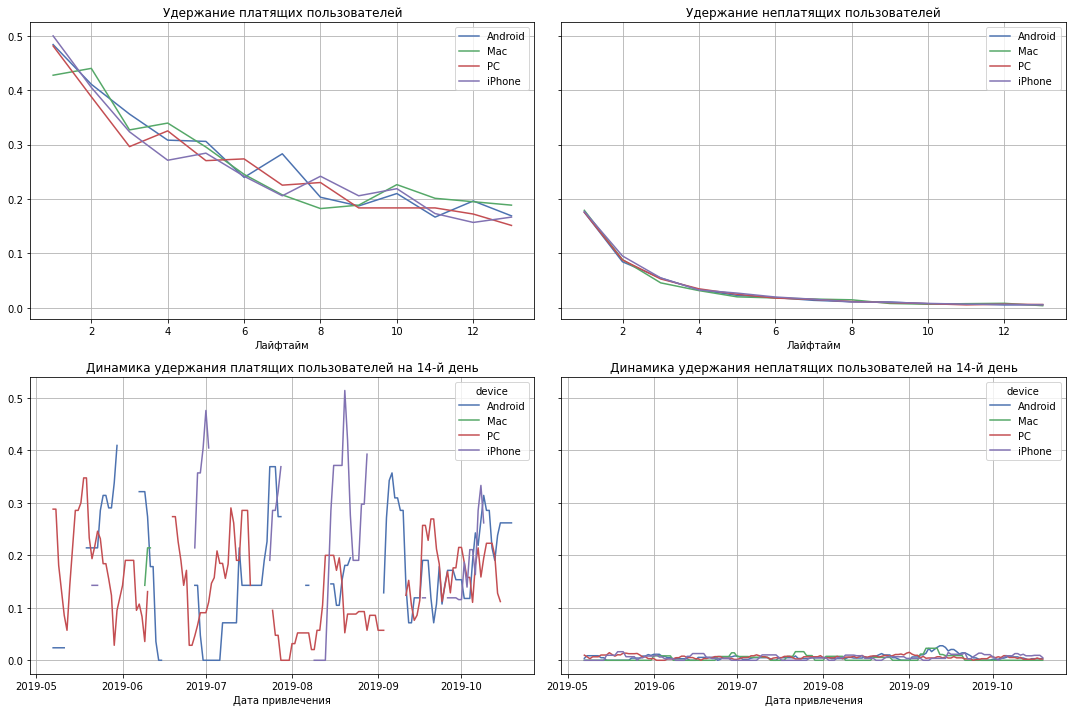

In [77]:
result_raw, result_grouped, result_in_time = get_retention(profiles_euro, visits, observation_date, \
                                                           horizon_days, dimensions=['device'])
plot_retention(result_grouped, result_in_time, horizon_days, window=7)

Европа - динамика удержания  платящих пользователей существенно отличается по неплатящим  от старта жизни до окончания. Отметим что  платформа Mac почти не видна в динамике. Более наглядны PC\Android. Есть  спуск до 0 показателя  у устройств PC\Android в летний период.

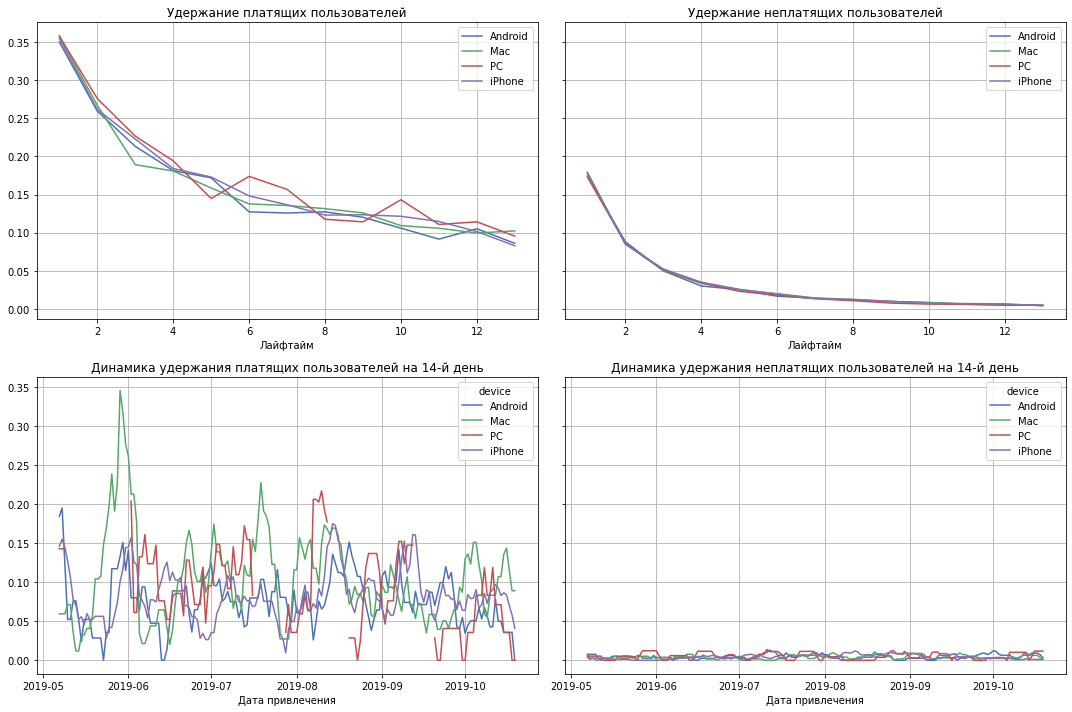

In [78]:
result_raw, result_grouped, result_in_time = get_retention(profiles_usa, visits, observation_date, \
                                                           horizon_days, dimensions=['device'])
plot_retention(result_grouped, result_in_time, horizon_days, window=7)

США - динамика удержания  платящих пользователей существенно отличается по неплатящим  от старта жизни до окончания, в июне  всплеск  платформы Mac, далее динамика  выравнивается относительно платящих пользователей и  платформ. Что  можно заметить - платящие пользоваели платформ PC \ Android  чаще подходили к 0- уровню чем  другие.

И тут PC выделяется.

#### Выводы:

__Основываясь на  предоставленных нам  данных в период 01.05.2019 - 27.10.2019 проведения рекламных компаний для приложения Procrastinate Pro+ мы можем сделать следующие выводы:__

Первое место по объему пользователей занимает США, количество пользователей больше суммарных данных по другим странам. Аудитория  из США  - более 75 %.

Одинаковая ситуация как у платящих  и у неоплаченных посетителей. США на первом месте. Но следует отметить что пользователи из Германии в процентном соотношении несколько чаще оплачивают пользование платформой по сравнению с Францией и Британией.

Пользователи платформ iPhone на первом месте по посещению нашего приложения. Владельцы устройств на базе Android  и далее Mac  следуют за лидером.  На последнем месте - пользователи PC.

С 11 платформ приходили пользователи. Самая популярная платформа с которой заходили Платящие пользователи на первом месте(по убыванию): FaceBoom, AdNonSense, TipTop, lambdaMediaAds  замыкает ряд Organic.

Более всего было выделено (чуть боль 50% процентов) от потраченных средств на платформу TipTop, около четверти всех средств - на FaceBoom.  Но и стоимость привлечения пользователя с платформы TipTop - самая высокая. Если округлить - 2,80 у.е. в то время как FaceBoom, которая привлекает больше пользователей, в т.ч. имеющий статус "Платящих" - 1,11 у.е. Можем сравнить с самой низкой стоимость привлечения 1 пользователя - канал 'LeapBob' - 0.210172 у.е на человека. 

С мая-июня Динамика ROI  стабильно падает именно  с июня, маркетологи заметили тенденцию и попытались  вернуть показатели.  Поэтому Procrastinate Pro+   именно с того времени постепенно увеличивается бюджет на привлечение пользователей.


LTV  "прыгает" но стабилен, нет определенного тренда в динамики, диапазон в районе 0,7 - и немного выше 1, дело не в ухудшении качества пользователей.

Показатель окупаемости инвестиций ROI не пересекает порог окупаемости  и находится на уровне 80%. Соответственно реклама не окупается. 

Retention Rate  показывает что коэффициент удержания платящих пользователей  сильно выше  неплатящих пользователей.
Конверсия пользователей платформы PC имеет более низкие показатели, все оставшиеся платформы на порядок выше. 
Конверсия жителей  США существенно выше  всех остальных стран. 
Конверсия каналов LambdaMediaAds & FaceBoom имеет  более высокие показатели.


По всем показателям видим   что в мае - июне  сотрудники Procrastinate Pro+ запустили новую акцию по привлечению  пользователей  в странах Европы и США. Она была  плохо продумана. Во первых основные каналы на который были выделены  денежные средства - используются  и популярны в США.
К Примеру на канал TipTop  было выделено существенно больше средств в то время как канал FaceBoom показал лучшие  данные по конверсии посетителей как отдельно по   разделению регионов так и  при сепарации  каналов  только по  региону США.


Обратить внимание отделу  маркетинга: 
Проводить  регулярные предварительные исследования  рынков  привлечения  к Развлекательному приложению.
Расширить   круг стран Европы (если  контент содержащийся в  Приложении  релевантен  ТОЛЬКО для стран Европы и США) -  Жители стран Северной  Европы тоже довольно платежеспособны (принимаем как гипотезу для будущей проверки) + выяснить рейтинг  ТОП- 10 стран Европы по уровню жизни.
Нам нужно диверсифицировать риски если  пользователям, к примеру, не понравится изменение любого рода в приложении). Привлечение стоит денег, а возврат  пользователя  требует и денег и времени.


В США  каналы конверсии и наименьшие  показатели динамики конверсии на 14 день имеют YRabbit & MediaTornado - аутсайдеры.
В Европе  такими являются OppleCreativeMedia  & 'LeapBob'- следует отказаться от  инвестиций в рекламу.
В Европе несмотря на лучшие  конверсии  пользователей канала  AdNonSense показатели по удержанию платящих пользователей - самые низкие, Такие же низкие показатели по удержанию платящих пользователей касаются  FaceBoom популярной в США.


При следующем Раунде  оплат в целях привлечения  пользователей стоит рассмотреть lambdaMediaAds  - она в 4- ке лидеров  Пользовательских платформ, с FaceBoom  и AdNonSense мы  указали  причины,   в TipTop  уже вложил подавляющее кол-во ср-в, пользователи этого канала  о нас знают, поэтому стоит рассмотреть и lambdaMediaAds, к тому же нужно учесть  что стоимость  работы с  популярными платформами  существенно дороже чем с lambdaMediaAds  ее средняя стоимость привлечения клиентов- 0.724802 - в разы  дешевле чем Топы, Помним что средняя стоимость  привлечения одного уникального пользователя по рассмотренному нами  бюджету   составил 1,127 у.е.  у.е на  уникального пользователя в среднем. 



Европа  - AdNonSense -  & lambdaMediaAds лучшие показатели конверсии,  11%  платящих  посетителей по отношению  ко всем  на платформе AdNonSense + хорошие показатели окупаемости, но удержание платных пользователей самое низкое  - оставить на   заметку и оценивать дальнейшую динамику на перспективу.  WahooNetBsnnr (0,60 у.е. стоимость привлечения пользователя)- хорошие показатели удержания платных пользователей на 14 день,  к концу 14 дня вышел на 3 место по показателям окупаемости.
Рекомендации - ставить на lambdaMediaAds,  и обратить внимание на WahooNetBanner, а   AdNonSense "попридержать". 

Дополнительно  задать разработчикам  платформы  вопросы по возможным причинам неустойчивости работы  приложения на платформах - есть ли такая  зависимость? Динамика  удержания хаотичная и рваная. Складывается ощущение что  по Европейским потребителям идет постоянная перенастрока Приложения.


США - каналы привлечения MediaTornado - ROI  выходит за границу  1 так же как   кналы YRabbit и RocketSuperAds, но  конверсия у RocketSuperAds Выше чем у 2  предыдущих каналов, 8%  платящих пользователей об объема, у MediaTornado (0,22 у.е.) -стоимость привлечения пользователя, YRabbit(0,22  у.е.) стоимость привлечения пользователя и RocketSuperAds(0,41 у.е.) -стоимость привлечения пользователя.
Обратила бы внимание в таком порядке на  каналы:RocketSuperAds, YRabbit, MediaTornado.

Обратить внимание разработчиков  приложения: Mac -   лучше видно на графике  динамики удержания. Что произошло осенью с PC? - можно  же оставшиеся платформы довести  хотя бы до уровня Mac. 
